In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import cv2
from PIL import Image
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, BatchNormalization, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
labels = os.listdir('../input/flowers-recognition/flowers/')
print(labels)

['tulip', 'daisy', 'sunflower', 'rose', 'flowers', 'dandelion']


In [3]:
X = []
Z = []
IMG_SIZE = 128
FLOWER_DAISY_DIR = "../input/flowers-recognition/flowers/daisy"
FLOWER_DANDELION_DIR = "../input/flowers-recognition/flowers/dandelion"
FLOWER_ROSE_DIR = "../input/flowers-recognition/flowers/rose"
FLOWER_SUNFLOWER_DIR = "../input/flowers-recognition/flowers/sunflower"
FLOWER_TULIP_DIR = "../input/flowers-recognition/flowers/tulip"

In [4]:
def assign_label(img, flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
make_train_data('Daisy', FLOWER_DAISY_DIR)

100%|██████████| 769/769 [00:04<00:00, 186.46it/s]


In [8]:
make_train_data('Dandelion', FLOWER_DANDELION_DIR)

  8%|▊         | 85/1055 [00:00<00:02, 338.89it/s]


error: OpenCV(4.3.0) /io/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [9]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)

100%|██████████| 734/734 [00:04<00:00, 180.21it/s]


In [10]:
make_train_data('Tulip', FLOWER_TULIP_DIR)

100%|██████████| 984/984 [00:04<00:00, 211.49it/s]


In [11]:
make_train_data('Rose', FLOWER_ROSE_DIR)

100%|██████████| 784/784 [00:04<00:00, 188.48it/s]


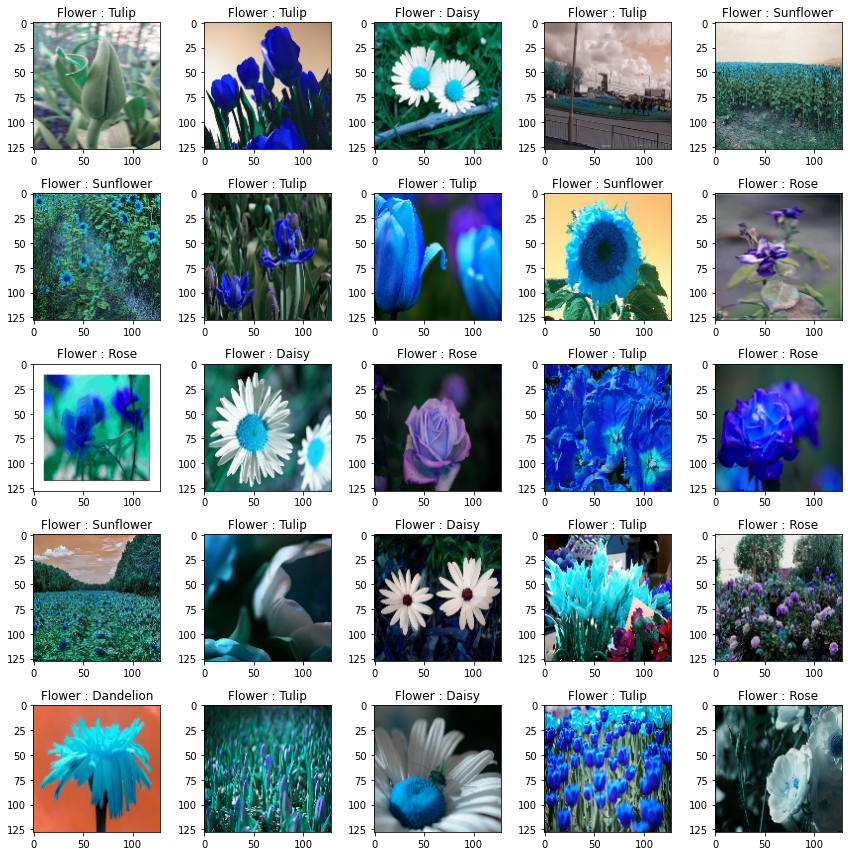

In [12]:
fig, ax = plt.subplots(5,5)
fig.set_size_inches(12,12)
for i in range(5):
    for j in range(5):
        l = random.randint(0, len(Z))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Flower : ' +Z[l])
        
plt.tight_layout()

X and Y dataset.

In [13]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Z)
Y = keras.utils.to_categorical(Y, num_classes = 5)

X = np.array(X)
X = X / 255

In [14]:
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

Splitting of the image dataset.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35, random_state = 42)

In [16]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((2236, 128, 128, 3), (2236, 5), (1205, 128, 128, 3), (1205, 5))

In [17]:
np.random.seed(42)
random.seed(42)

**Keras Model.**

In [21]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (128,128,3), name = 'Conv2D_1'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu', name = 'Conv2D_2'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))

model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', activation = 'relu', name = 'Conv2D_3'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))

model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same', activation = 'relu', name = 'Conv2D_4'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation = 'softmax'))

model.compile(loss = keras.losses.CategoricalCrossentropy(),
             optimizer = keras.optimizers.Adam(learning_rate = 0.001),
             metrics = [keras.metrics.CategoricalAccuracy()])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 42, 42, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 42, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 14, 14, 64)        1

To reduce overfitting.

In [22]:
datagen = ImageDataGenerator(
    
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range= 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False    # randomly flip images
) 

datagen.fit(X_train)

In [26]:
model_history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),
                                    epochs = 50, validation_data = (X_test, y_test),
                                    verbose = 1, steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/50
34/34 [==============================] - 8s 236ms/step - loss: 0.2234 - categorical_accuracy: 0.9171 - val_loss: 0.7865 - val_categorical_accuracy: 0.7776
Epoch 2/50
34/34 [==============================] - 8s 247ms/step - loss: 0.2443 - categorical_accuracy: 0.9047 - val_loss: 0.9431 - val_categorical_accuracy: 0.7344
Epoch 3/50
34/34 [==============================] - 9s 269ms/step - loss: 0.2038 - categorical_accuracy: 0.9213 - val_loss: 0.9207 - val_categorical_accuracy: 0.7286
Epoch 4/50
34/34 [==============================] - 9s 252ms/step - loss: 0.2521 - categorical_accuracy: 0.9065 - val_loss: 0.7014 - val_categorical_accuracy: 0.7726
Epoch 5/50
34/34 [==============================] - 8s 249ms/step - loss: 0.2165 - categorical_accuracy: 0.9157 - val_loss: 0.9771 - val_categorical_accuracy: 0.7452
Epoch 6/50
34/34 [==============================] - 8s 236ms/step - loss: 0.2220 - categorical_accuracy: 0.9102 - val_loss: 0.7833 - val_categorical_accuracy: 0.7842
Epoc

34/34 [==============================] - 8s 245ms/step - loss: 0.1205 - categorical_accuracy: 0.9558 - val_loss: 0.8931 - val_categorical_accuracy: 0.7693


Evaluation of the model.

In [27]:
model_eva = model.evaluate(X_test, y_test)

print('Loss : ', model_eva[0])
print('Accuracy : ', model_eva[1]*100)

38/38 [==============================] - 0s 6ms/step - loss: 0.8931 - categorical_accuracy: 0.7693
Loss :  0.8931264877319336
Accuracy :  76.92946195602417


Graph regarding loss and accuracy.

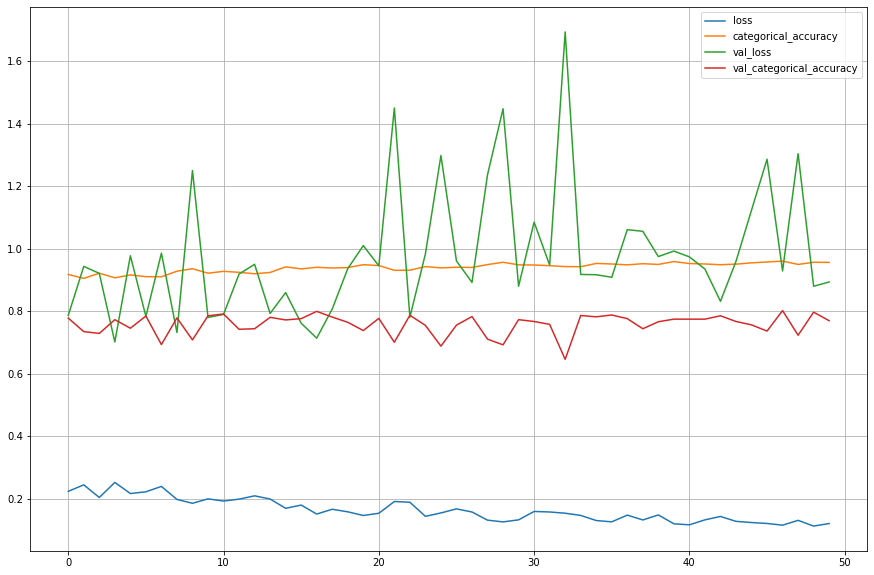

In [28]:
pd.DataFrame(model_history.history).plot(figsize = (15,10))
plt.gca()
plt.grid(True)
plt.show()

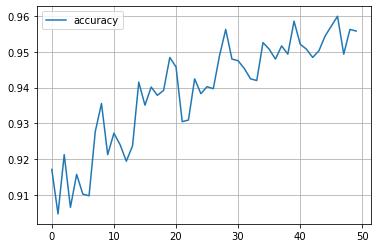

In [29]:
accuracy = model_history.history['categorical_accuracy']
plt.plot(range(len(accuracy)), accuracy, label = 'accuracy')
plt.legend()
plt.grid(True)

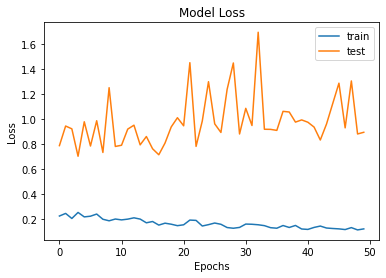

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.grid(True)
plt.show()

In [32]:
y_pred = model.predict_classes(X_test)
y_pred

array([4, 0, 2, ..., 4, 4, 4])

In [33]:
y_test = y_test.argmax(1)
y_test

array([3, 0, 3, ..., 2, 4, 2])

In [34]:
y_test = y_test.reshape(-1,1)

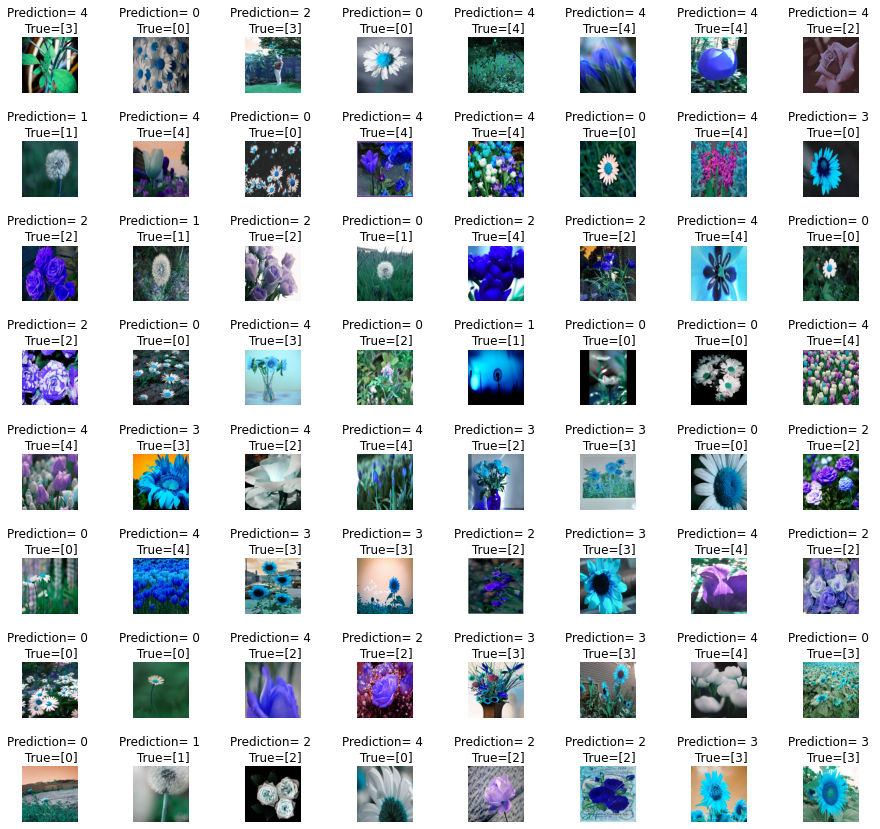

In [35]:
L = 8
W = 8
fig,axes = plt.subplots(L,W,figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction= {} \n True={}'.format(y_pred[i], y_test[i]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**THE END**